In [210]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import scipy as sp
import glob
import astropy
from astropy import units as u
from astropy.table import Table
from astropy.constants import cgs, G, R_sun, GM_sun, M_sun, R_sun
from scipy.interpolate import interp1d, interp2d, LinearNDInterpolator, griddata
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter, AutoMinorLocator)
%matplotlib inline

In [3]:
class He:
    
    M1 = 0.18687
    M2 = 0.20264
    M3 = 0.24948
    M4 = 0.30559
    M5 = 0.33327
    M6 = 0.35153
    M7 = 0.38445
    M8 = 0.39855
    M9 = 0.41599
    M10 = 0.44810
    
#     m1 = np.loadtxt('He-core/m0.18687He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m2 = np.loadtxt('He-core/m0.20264He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m3 = np.loadtxt('He-core/m0.24948He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m4 = np.loadtxt('He-core/m0.30559He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m5 = np.loadtxt('He-core/m0.33327He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m6 = np.loadtxt('He-core/m0.35153He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m7 = np.loadtxt('He-core/m0.38445He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m8 = np.loadtxt('He-core/m0.39855He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m9 = np.loadtxt('He-core/m0.41599He.g-r', usecols=(1, 3, 4))[-1700:,:]
#     m10 = np.loadtxt('He-core/m0.44810He.g-r', usecols=(1, 3, 4))[-1700:,:]
    
# HeMass = np.array([He.M1, He.M2, He.M3, He.M4, He.M5, He.M6, He.M7, He.M8, He.M9, He.M10])
# HeCore = np.empty((1600,3,10))
# n=0
# for fname in sorted(glob.iglob('He-core/m*')):
#     print(n)
#     HeCore[:,:,n] = np.loadtxt(fname, usecols=(1, 3, 4))[-1600:,:]
#     n+=1

class CO:
#     
    M1 = 0.3
    M2 = 0.4
    M3 = 0.5
    M4 = 0.6
    M5 = 0.7
    M6 = 0.8
    M7 = 0.9
    M8 = 1.0
    M9 = 1.2
    
# #     m1 = np.loadtxt('CO-core/Table_Mass_0.2', skiprows=2, usecols=(0,1,2), dtype='str')[:40,:]
#     m1 = np.loadtxt('CO-core/Table_Mass_0.3', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m2 = np.loadtxt('CO-core/Table_Mass_0.4', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m3 = np.loadtxt('CO-core/Table_Mass_0.5', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m4 = np.loadtxt('CO-core/Table_Mass_0.6', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m5 = np.loadtxt('CO-core/Table_Mass_0.7', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m6 = np.loadtxt('CO-core/Table_Mass_0.8', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m7 = np.loadtxt('CO-core/Table_Mass_0.9', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m8 = np.loadtxt('CO-core/Table_Mass_1.0', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
#     m9 = np.loadtxt('CO-core/Table_Mass_1.2', skiprows=2, usecols=(0,1), dtype='str')[:49,:]
    
    
#     m1 = m1.astype('float')
#     m2 = m2.astype('float')
#     m3 = m3.astype('float')
#     m4 = m4.astype('float')
#     m5 = m5.astype('float')
#     m6 = m6.astype('float')
#     m7 = m7.astype('float')
#     m8 = m8.astype('float')
#     m9 = m9.astype('float')

# COmass = np.array([CO.M1, CO.M2, CO.M3, CO.M4, CO.M5, CO.M6, CO.M7, CO.M8, CO.M9])
# ### CO.m10.astype('float')

class ONe:
    
    M1 = 1.06
    M2 = 1.08
    M3 = 1.10
    M4 = 1.12
    M5 = 1.14
    M6 = 1.16
    M7 = 1.18
    M8 = 1.20
    M9 = 1.22
    M10 = 1.24
    M11 = 1.26
    M12 = 1.28
    M13 = 1.30
    
#     m1 = np.loadtxt('ONe-core/t106.one', usecols=(1,2))
#     m2 = np.loadtxt('ONe-core/t108.one', usecols=(1,2))
#     m3 = np.loadtxt('ONe-core/t110.one', usecols=(1,2))
#     m4 = np.loadtxt('ONe-core/t112.one', usecols=(1,2))
#     m5 = np.loadtxt('ONe-core/t114.one', usecols=(1,2))
#     m6 = np.loadtxt('ONe-core/t116.one', usecols=(1,2))
#     m7 = np.loadtxt('ONe-core/t118.one', usecols=(1,2))
#     m8 = np.loadtxt('ONe-core/t120.one', usecols=(1,2))
#     m9 = np.loadtxt('ONe-core/t122.one', usecols=(1,2))
#     m10 = np.loadtxt('ONe-core/t124.one', usecols=(1,2))
#     m11 = np.loadtxt('ONe-core/t126.one', usecols=(1,2))
#     m12 = np.loadtxt('ONe-core/t128.one', usecols=(1,2))
#     m13 = np.loadtxt('ONe-core/t130.one', usecols=(1,2))
    
# ONeMass = np.array([ONe.M1, ONe.M2, ONe.M3, ONe.M4, ONe.M5, ONe.M6, ONe.M7, ONe.M8, ONe.M9, ONe.M10, ONe.M11, ONe.M12, ONe.M13])

# ONeCore = np.empty((1600,3,10))
# n=0
# for fname in sorted(glob.iglob('ONe-core/*')):
#     print(n)
#     ONeCore[:,:,n] = np.loadtxt(fname, usecols=(1, 2))
#     n+=1

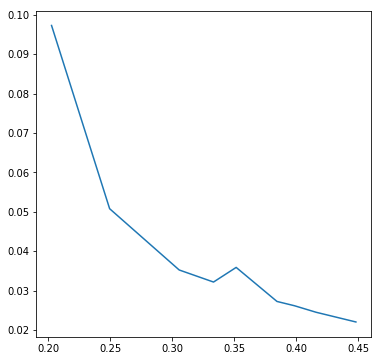

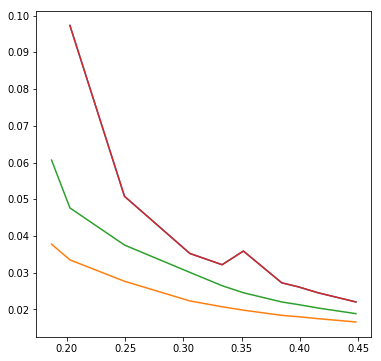

In [4]:
HeMass = np.array([He.M1, He.M2, He.M3, He.M4, He.M5, He.M6, He.M7, He.M8, He.M9, He.M10])
COmass = np.array([CO.M1, CO.M2, CO.M3, CO.M4, CO.M5, CO.M6, CO.M7, CO.M8, CO.M9])
ONeMass = np.array([ONe.M1, ONe.M2, ONe.M3, ONe.M4, ONe.M5, ONe.M6, ONe.M7, ONe.M8, ONe.M9, ONe.M10, ONe.M11, ONe.M12, ONe.M13])


i=0
# print(HeMass)
HeRarr = np.empty((len(HeMass), 2))
for T in [10000, 20000]:

#     rarr = np.empty((len(HeMass), 2))
    radii = []
    for fname in sorted(glob.iglob('He-core/*He.g-r')):
        HeData = np.loadtxt(fname, usecols=(1, 3))
        cutxData = 10**HeData[np.argmax(HeData[:,0]):,0]
        cutyData = HeData[np.argmax(HeData[:,0]):,1]
        uniqueX, idx = np.unique(cutxData, return_index=True)
        uniqueY = cutyData[idx]
#         print(cutxData)
        a = interp1d(uniqueX, uniqueY, kind='slinear')
#         print(a(T))
        radii.append(float(a(T)))
#         print(radii)
    HeRarr[:,i] = np.array(radii)
#     print(rarr)
    i+=1

# i=2
radii = []
# radii.append(0)
for fname in sorted(glob.iglob('He-core/m*')):
    HeData = np.loadtxt(fname, usecols=(1, 3))
    peakIdx = np.argmax(HeData[:,0])
    cutxData = 10**HeData[peakIdx:,0]
    cutyData = HeData[peakIdx:,1]
    uniqueX, idx = np.unique(cutxData, return_index=True)
    uniqueY = cutyData[idx]
#         print(cutxData)
    a = interp1d(cutxData, cutyData)
#         print(a(T))
    radii.append(float(a(30000)))
#         print(radii)

rarr30 = np.array(radii)
#     print(rarr)

   
data = np.loadtxt('He-core/hmass_1E4.dat')
data30 = data[-17:-8,:]
# print(data30)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(data30[:,0], data30[:,2])
# plt.show()
    
# print(rarr)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(data30[:,0], data30[:,2])

ax.plot(HeMass, HeRarr[:,0])
ax.plot(HeMass, HeRarr[:,1])
ax.plot(HeMass[1:], rarr30)
plt.show()

[[2.02640000e-01 3.00000000e+04 9.73170624e-02]
 [2.49480000e-01 3.00000000e+04 5.08039235e-02]
 [3.05590000e-01 3.00000000e+04 3.52463317e-02]
 [3.33270000e-01 3.00000000e+04 3.21842939e-02]
 [3.51530000e-01 3.00000000e+04 3.58989729e-02]
 [3.84450000e-01 3.00000000e+04 2.72568111e-02]
 [3.98550000e-01 3.00000000e+04 2.61694494e-02]
 [4.15990000e-01 3.00000000e+04 2.45128894e-02]
 [4.48100000e-01 3.00000000e+04 2.20471483e-02]]


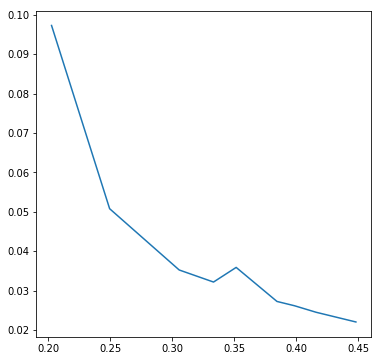

In [5]:
data = np.loadtxt('He-core/hmass_1E4.dat')
data30 = data[-17:-8,:]
print(data30)
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(data30[:,0], data30[:,2])
plt.show()

$g=\frac{GM}{R^{2}}$

In [6]:

def logg2R(M, logg):
    m = M * M_sun.cgs
    R = np.sqrt((G.cgs * m)/10**logg)
    return R / R_sun.cgs

r1=[]
r2=[]
r3=[]
for fname in sorted(glob.iglob('CO-core/Table_M*')):
    mass = float(fname[-3:])
    COData = np.loadtxt(fname, skiprows=2, usecols=(0,1), dtype='str')[:49,:]
    temp = COData[:,0].astype('float')
    grav = COData[:,1].astype('float')

    logg1 = grav[temp == 10000]
    logg2 = grav[temp == 20000]
    logg3 = grav[temp == 30000]
    
    R1 = logg2R(mass, logg1)
    R2 = logg2R(mass, logg2)
    R3 = logg2R(mass, logg3)
    r1.append(R1)
    r2.append(R2)
    r3.append(R3)
    
R1 = np.array(r1)
R2 = np.array(r2)
R3 = np.array(r3)

# fig, ax = plt.subplots(figsize=(6,6))
# ax.plot(COmass, R1)
# ax.plot(COmass, R2)
# ax.plot(COmass, R3)
# plt.show()

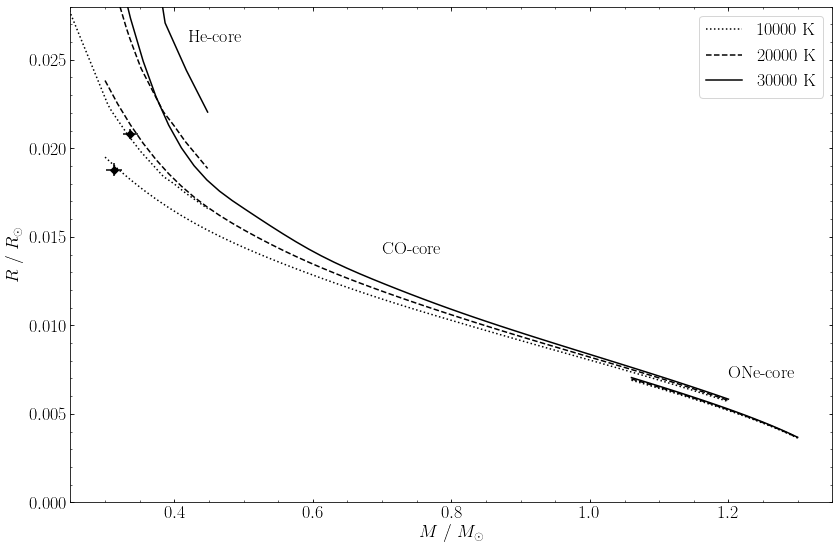

In [354]:
R10=[]
R20=[]
R30=[]
for fname, mass in zip(sorted(glob.glob('ONe-core/t*')), ONeMass):
    ONeData = np.loadtxt(fname, usecols=(1,2))
    Teff = 10**ONeData[:,0]
    R = (10**ONeData[:,1]) / R_sun.cgs.value
    x = interp1d(Teff,R)
    R10.append(x(10000))
    R20.append(x(20000))
    R30.append(x(30000))
r10 = np.array(R10)
r20 = np.array(R20)
r30 = np.array(R30)


h = interp1d(HeMass, HeRarr[:,0], kind='linear') # between 0.186 & 0.44
i = interp1d(HeMass, HeRarr[:,1], kind='linear') # between 0.186 & 0.44
j = interp1d(HeMass[1:], rarr30, kind='linear')
# print(COmass.shape, R1.shape)
k = interp1d(COmass, R1.reshape(9), kind='cubic')
l = interp1d(COmass, R2.reshape(9), kind='cubic')
m = interp1d(COmass, R3.reshape(9), kind='cubic')
n = interp1d(ONeMass, r10, kind='cubic')
o = interp1d(ONeMass, r20, kind='cubic')
p = interp1d(ONeMass, r30, kind='cubic')


matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 18


fig, ax = plt.subplots(figsize=(12,8))

HeGrid = np.linspace(0.18687, 0.4481, 50)
HeGrid2 = np.linspace(0.20264, 0.4481, 9)
COgrid = np.linspace(0.3, 1.2, 50)
ONeGrid = np.linspace(1.06, 1.3, 20)

# z = np.polyfit(HeMass, rarr[:,0], 3)
# p = np.poly1d(z)
# q = np.polyfit(HeMass, rarr[:,1], 3)
# f = np.poly1d(q)
# ax.plot(HeGrid, p(HeGrid))

ax.plot(HeGrid, h(HeGrid), 'k:', label='10000 K')
ax.plot(HeGrid, i(HeGrid), 'k--', label='20000 K')
ax.plot(HeGrid2, j(HeGrid2), 'k-', label='30000 K')
ax.plot(COgrid, k(COgrid), 'k:')
ax.plot(COgrid, l(COgrid), 'k--')
ax.plot(COgrid, m(COgrid), 'k-')
ax.plot(ONeGrid, n(ONeGrid), 'k:')
ax.plot(ONeGrid, o(ONeGrid), 'k--')
ax.plot(ONeGrid, p(ONeGrid), 'k-')

ax.set_xlabel('$M~/~M_{\odot}$')
ax.set_ylabel('$R~/~R_{\odot}$')

ax.legend()

# ax.scatter(HeMass, rarr[:,0])
# ax.scatter(HeMass, rarr[:,1])

# ax.scatter(COmass, R1)
# ax.scatter(COmass, R2)
# ax.scatter(COmass, R3)

ax.errorbar(0.3130, 0.01878, xerr=0.011, yerr=[[0.00035],[0.0003805]], ecolor='k', marker='D', color='k')
ax.errorbar(0.3365, 0.020798, xerr=0.011, yerr=[[0.000297],[0.000305]], ecolor='k', marker='D', color='k')

# ax.errorbar(0.378, 0.02224, xerr=0.023, yerr=[[0.00041],[0.00041]], ecolor='k', marker='o', color='k')
# ax.errorbar(0.316, 0.02066, xerr=0.011, yerr=[[0.00042],[0.00042]], ecolor='k', marker='o', color='k')

# ax.errorbar(0.313, 0.018828, xerr=0.011, yerr=[[0.000365],[0.000376]], ecolor='0.4', marker='D', color='0.4')
# ax.errorbar(0.337, 0.020791, xerr=0.011, yerr=[[0.000296],[0.000302]], ecolor='0.4', marker='D', color='0.4')
# ax.scatter(ONeMass, r10)
# ax.scatter(ONeMass, r20)
# ax.scatter(ONeMass, r30)
ax.annotate('He-core', (0.42,0.026))
ax.annotate('CO-core', (0.7,0.014))
ax.annotate('ONe-core', (1.2,0.007))

majorLocatorx = MultipleLocator(0.2)
minorLocatorx = MultipleLocator(0.05)
majorLocatory = MultipleLocator(0.005)
minorLocatory = MultipleLocator(0.001)

ax.xaxis.set_major_locator(majorLocatorx)
ax.yaxis.set_major_locator(majorLocatory)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)

ax.set_xlim([0.25,1.35])
ax.set_ylim([0,0.028])
# ax.errorbar?
ax.tick_params(direction='in',which='both',right=True,top=True)
plt.tight_layout()
plt.show()
fig.savefig('MR-Results.pdf')

In [88]:
def find_nearest(array, value):
    
    array = np.asarray(array)
    idx = (np.abs(array - value)).argmin()
    
    return array[idx]

def interpolator(Teff, Mass, H_mass='1e4'):
    
    He_1e4 = np.loadtxt('hmass_1E4.dat')
    He_1e6 = np.loadtxt('hmass_1E6.dat')
    He_1e8 = np.loadtxt('hmass_1E8.dat')
    
    if H_mass=='1e4':
        M = He_1e4[:,0]
        T = He_1e4[:,1]
        R = He_1e4[:,2]
        
    elif H_mass=='1e6':
        M = He_1e6[:,0]
        T = He_1e6[:,1]
        R = He_1e6[:,2]
        
    elif H_mass=='1e8':
        M = He_1e8[:,0]
        T = He_1e8[:,1]
        R = He_1e8[:,2]
        
    coords_in = list(zip(M,T))
    coords_out = list(R)
    ndinterp = LinearNDInterpolator(coords_in,coords_out, rescale=True)
    
    
    return ndinterp(Mass, Teff)

In [90]:
print(interpolator(15000,0.3,H_mass='1e8'))

0.02199040099009901


In [223]:
def logg2rad(M,logg):
    g = 10**logg * (u.cm/u.s/u.s)
    R = np.sqrt((G * M * u.M_sun)/g)
    return R.to_value(u.R_sun)

CO_02_thick = np.loadtxt('CO-core/CO_0200204', usecols=(1,2))
CO_02_thin = np.loadtxt('CO-core/CO_0200210', usecols=(1,2))
CO_03_thick = np.loadtxt('CO-core/CO_0300204', usecols=(1,2))
CO_03_thin = np.loadtxt('CO-core/CO_0300210', usecols=(1,2))
CO_04_thick = np.loadtxt('CO-core/CO_0400204', usecols=(1,2))
CO_04_thin = np.loadtxt('CO-core/CO_0400210', usecols=(1,2))
CO_05_thick = np.loadtxt('CO-core/CO_0500204', usecols=(1,2))
CO_05_thin = np.loadtxt('CO-core/CO_0500210', usecols=(1,2))

CO_02_thick[:,1] = logg2rad(0.2,CO_02_thick[:,1])
CO_02_thin[:,1] = logg2rad(0.2,CO_02_thin[:,1])
CO_03_thick[:,1] = logg2rad(0.3,CO_03_thick[:,1])
CO_03_thin[:,1] = logg2rad(0.3,CO_03_thin[:,1])
CO_04_thick[:,1] = logg2rad(0.4,CO_04_thick[:,1])
CO_04_thin[:,1] = logg2rad(0.4,CO_04_thin[:,1])
CO_05_thick[:,1] = logg2rad(0.5,CO_05_thick[:,1])
CO_05_thin[:,1] = logg2rad(0.5,CO_05_thin[:,1])

In [238]:
m02_thin = np.full(len(CO_02_thin), 0.2)
m03_thin = np.full(len(CO_03_thin), 0.3)
m04_thin = np.full(len(CO_04_thin), 0.4)
m05_thin = np.full(len(CO_05_thin), 0.5)

m02_thick = np.full(len(CO_02_thick), 0.2)
m03_thick = np.full(len(CO_03_thick), 0.3)
m04_thick = np.full(len(CO_04_thick), 0.4)
m05_thick = np.full(len(CO_05_thick), 0.5)

CO_thin_02 = np.column_stack((m02_thin,CO_02_thin))
CO_thin_03 = np.column_stack((m03_thin,CO_03_thin))
CO_thin_04 = np.column_stack((m04_thin,CO_04_thin))
CO_thin_05 = np.column_stack((m05_thin,CO_05_thin))

CO_thick_02 = np.column_stack((m02_thick,CO_02_thick))
CO_thick_03 = np.column_stack((m03_thick,CO_03_thick))
CO_thick_04 = np.column_stack((m04_thick,CO_04_thick))
CO_thick_05 = np.column_stack((m05_thick,CO_05_thick))

CO_thin = np.vstack((CO_thin_02,CO_thin_03,CO_thin_04,CO_thin_05))
CO_thick = np.vstack((CO_thick_02,CO_thick_03,CO_thick_04,CO_thick_05))

In [241]:
def interpolator_CO(Teff, Mass, CO_mass='thick'):
    
    if CO_mass=='thick':
        M = CO_thick[:,0]
        T = CO_thick[:,1]
        R = CO_thick[:,2]
        
    elif CO_mass=='thin':
        M = CO_thin[:,0]
        T = CO_thin[:,1]
        R = CO_thin[:,2]
        
    coords_in = list(zip(M,T))
    coords_out = list(R)
    ndinterp = LinearNDInterpolator(coords_in,coords_out, rescale=True)
    
    
    return ndinterp(Mass, Teff)

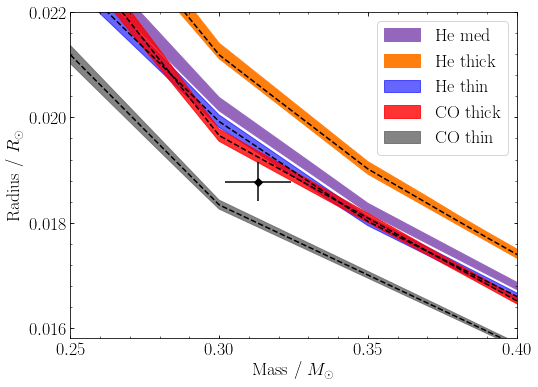

In [355]:
x = np.arange(0.25,0.45,0.01)

He1 = interpolator(10100,x,H_mass='1e4')
Hek = interpolator(10400,x,H_mass='1e4')
He2 = interpolator(10760,x,H_mass='1e4')

He3 = interpolator(10100,x,H_mass='1e8')
Hen = interpolator(10400,x,H_mass='1e8')
He4 = interpolator(10760,x,H_mass='1e8')

He5 = interpolator(10100,x,H_mass='1e6')
# Hen = interpolator(10400,x,H_mass='1e8')
He6 = interpolator(10760,x,H_mass='1e6')

CO1 = interpolator_CO(10100,x,CO_mass='thick')
COk = interpolator_CO(10400,x,CO_mass='thick')
CO2 = interpolator_CO(10760,x,CO_mass='thick')

CO3 = interpolator_CO(10100,x,CO_mass='thin')
COn = interpolator_CO(10400,x,CO_mass='thin')
CO4 = interpolator_CO(10760,x,CO_mass='thin')

fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(x, y, 'k:')
# ax.plot(COgrid, k(COgrid), 'k--')
# # ax.plot(COgrid, l(COgrid), 'k--')
# # ax.plot(COgrid, m(COgrid), 'k--')
ax.plot(x,COk,'k--')
ax.plot(x,COn,'k--')
ax.plot(x,Hek,'k--')
ax.plot(x,Hen,'k--')

# ax.fill_between(x,CO1,CO2, color='0.7',alpha=1)
# ax.fill_between(x,CO3,CO4, color='0.7',alpha=1)
# ax.fill_between(x,He1,He2, color='0.4',alpha=1)
# ax.fill_between(x,He3,He4, color='0.4',alpha=1)

ax.fill_between(x,He5,He6, color='tab:purple',alpha=1, label='He med')

ax.fill_between(x,He1,He2, color='tab:orange',alpha=1, label='He thick')
ax.fill_between(x,He3,He4, color='b',alpha=0.6, label='He thin')
ax.fill_between(x,CO1,CO2, color='r',alpha=0.8, label='CO thick')
ax.fill_between(x,CO3,CO4, color='0.4',alpha=0.8, label='CO thin')

# ax.errorbar(0.309, 0.01878, xerr=0.017, yerr=[[0.000365],[0.000376]], ecolor='k', marker='D', color='k')
ax.errorbar(0.313, 0.01878, xerr=0.011, yerr=[[0.000365],[0.000376]], ecolor='k', marker='D', color='k')
ax.legend()
ax.set_xlim([0.25,0.4])
ax.set_ylim([0.0158,0.022])

majorLocatorx = MultipleLocator(0.05)
minorLocatorx = MultipleLocator(0.01)
majorLocatory = MultipleLocator(0.002)
minorLocatory = MultipleLocator(0.0004)

ax.xaxis.set_major_locator(majorLocatorx)
ax.yaxis.set_major_locator(majorLocatory)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(direction='in',which='both',right=True,top=True)

ax.set_xlabel(r'Mass / $M_{\odot}$')
ax.set_ylabel(r'Radius / $R_{\odot}$')
# fig.savefig('WD2_trackcomp.pdf', bbox_to_inches='tight')
plt.show()

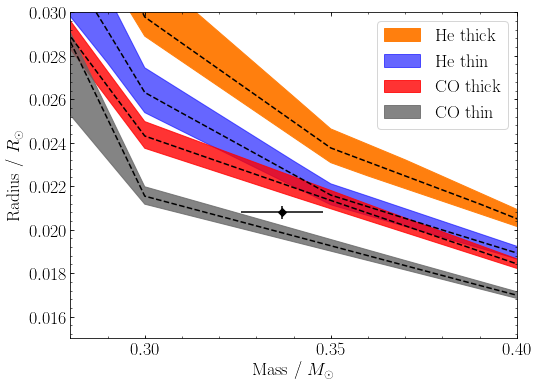

In [349]:
x = np.arange(0.25,0.45,0.01)
20810+1040-960
He1 = interpolator(19850,x,H_mass='1e4')
Hek = interpolator(20810,x,H_mass='1e4')
He2 = interpolator(21850,x,H_mass='1e4')

He3 = interpolator(19850,x,H_mass='1e8')
Hen = interpolator(20810,x,H_mass='1e8')
He4 = interpolator(21850,x,H_mass='1e8')

CO1 = interpolator_CO(19850,x,CO_mass='thick')
COk = interpolator_CO(20810,x,CO_mass='thick')
CO2 = interpolator_CO(21850,x,CO_mass='thick')

CO3 = interpolator_CO(19850,x,CO_mass='thin')
COn = interpolator_CO(20810,x,CO_mass='thin')
CO4 = interpolator_CO(21850,x,CO_mass='thin')

fig, ax = plt.subplots(figsize=(8,6))
# ax.plot(x, y, 'k:')
# ax.plot(COgrid, k(COgrid), 'k--')
# # ax.plot(COgrid, l(COgrid), 'k--')
# # ax.plot(COgrid, m(COgrid), 'k--')
ax.plot(x,COk,'k--')
ax.plot(x,COn,'k--')
ax.plot(x,Hek,'k--')
ax.plot(x,Hen,'k--')

# ax.fill_between(x,CO1,CO2, color='0.7',alpha=1)
# ax.fill_between(x,CO3,CO4, color='0.7',alpha=1)
# ax.fill_between(x,He1,He2, color='0.4',alpha=1)
# ax.fill_between(x,He3,He4, color='0.4',alpha=1)

ax.fill_between(x,He1,He2, color='tab:orange',alpha=1, label='He thick')
ax.fill_between(x,He3,He4, color='b',alpha=0.6, label='He thin')
ax.fill_between(x,CO1,CO2, color='r',alpha=0.8, label='CO thick')
ax.fill_between(x,CO3,CO4, color='0.4',alpha=0.8, label='CO thin')

# ax.errorbar(0.333, 0.02080, xerr=0.017, yerr=[[0.000296],[0.000302]], ecolor='k', marker='D', color='k')
ax.errorbar(0.337, 0.02080, xerr=0.011, yerr=[[0.000296],[0.000302]], ecolor='k', marker='D', color='k')
ax.legend()
ax.set_xlim([0.28,0.4])
ax.set_ylim([0.015,0.03])

majorLocatorx = MultipleLocator(0.05)
minorLocatorx = MultipleLocator(0.01)
majorLocatory = MultipleLocator(0.002)
minorLocatory = MultipleLocator(0.0004)

ax.xaxis.set_major_locator(majorLocatorx)
ax.yaxis.set_major_locator(majorLocatory)

ax.xaxis.set_minor_locator(minorLocatorx)
ax.yaxis.set_minor_locator(minorLocatory)
ax.tick_params(direction='in',which='both',right=True,top=True)

ax.set_xlabel(r'Mass / $M_{\odot}$')
ax.set_ylabel(r'Radius / $R_{\odot}$')
fig.savefig('WD1_trackcomp.pdf', bbox_to_inches='tight')
plt.show()

In [200]:
string=''
stringfull='1d;'
for i in range(2,1500):
#     print(i)
    if (i+1)%3==0 or (i)%3==0:
        d = "d;"
        line = str(i+1)
        string = line+d
        stringfull+= string
# print(stringfull)